# Lab 05. Regression and Clustering


In this lab we will tackle two types of tasks: 
- Regression Competition
- Clustering practice


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2022_lab05_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab05_404_Sheipak_Sviat.ipynb`
    - `2022_lab05_M106_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab05_GroupNumber_Surname_Name`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is `2022-12-08 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/gqo8GmBMUBfRuw

## Part 1. Regression [7 points]

The task is to predict a price of a house sold in California based on some description of a house. Some columns give some information on the house itself (number of bedrooms, short written summary and so on) and some describe the neighborhood (middleschoolscore, middleschooldistance).

* Id column - `id`
* Target column - `sold_price`
* Scoring is `RMSE` - root mean squared error

In [1]:
import numpy as np
import pandas as pd

In [ ]:
df_train = pd.read_csv("housing_train.csv")
df_test = pd.read_csv("housing_test.csv")

In [ ]:
numeric_cols = ['bathrooms', 'full_bathrooms', 'total_interior_livable_area', 'total_spaces', 'garage_spaces', 
                'elementary_school_score', 'elementary_school_distance', 'middle_school_score', 'middle_school_distance', 
                'high_school_score', 'high_school_distance', 'tax_assessed_value', 'listed_price', 
                'last_sold_price', 'year_built', 'annual_tax_amount']

cat_cols = ['type', 'heating', 'cooling', 'parking', 'bedrooms', 'region',
            'elementary_school', 'middle_school', 'high_school', 'flooring', 
            'heating_features', 'cooling_features', 'appliances_included', 
            'laundry_features', 'parking_features', 'city', 'zip', 'state', 'listed_on', 'last_sold_on']

text_cols = ['address', 'summary',]
target_cols = ['sold_price']
id_cols = ['id']

In [ ]:
train_num_df = df_train[numeric_cols].fillna(df_train[numeric_cols].mean(axis=0))
test_num_df = df_test[numeric_cols].fillna(df_test[numeric_cols].mean(axis=0))

In [ ]:
X_train, Y_train = train_num_df.values, df_train[target_cols].values
X_test, Y_test = test_num_df.values, df_test[target_cols].values

In [ ]:
len(Y_test)

2951

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [ ]:
lr_grid = {
    "alpha": np.logspace(-5, 3, 100)
}

lr_grid_searcher = GridSearchCV(Ridge(), lr_grid, cv=5, return_train_score=True, scoring="neg_root_mean_squared_error")
lr_grid_searcher.fit(X_train, Y_train)
lr_grid_searcher.best_estimator_,lr_grid_searcher.best_score_

(Ridge(alpha=1e-05), -0.25076060919970633)

In [ ]:
best_model = lr_grid_searcher.best_estimator_
best_model.fit(X_train, Y_train)

test_preds = best_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, test_preds))

0.2514677222697976

Get a score as low as possible:

Table ref:
```
Score < 0.25 - 1 points
Score < 0.24 - 2 points
Score < 0.22 - 3 points
Score < 0.21 - 5 points
Score < 0.20 - 6 points
Score < 0.18 - 7 points
```

Don't forget to use categorical and text features.

**Task 1.1** [7 points]

In [ ]:
db_train=df_train
db_test=df_test
#display(db_train)

In [ ]:
db_train["state"].value_counts()#[0:30]



db_test["state"].value_counts()#[0:30]

CA    2929
AZ      22
Name: state, dtype: int64

In [ ]:
state=db_train['state'].copy()
state=state.replace({'CA':1.0,'AZ':2.0})
db_train['state_new']=pd.Series(state)
#db_train['listed_on'] = pd.to_datetime(db_train['listed_on'])

db_train=db_train.drop(columns=['state'])




state=db_test['state'].copy();
state=state.replace({'CA':1,'AZ':2})
db_test['state_new']=pd.Series(state)
db_test=db_test.drop(columns=['state'])

In [ ]:
import datetime
db_train["last_sold_on"] = pd.to_datetime(db_train["last_sold_on"]).dt.strftime("%Y%m%d")
db_train["listed_on"] = pd.to_datetime(db_train["listed_on"]).dt.strftime("%Y%m%d")


db_test["last_sold_on"] = pd.to_datetime(db_test["last_sold_on"]).dt.strftime("%Y%m%d")
db_test["listed_on"] = pd.to_datetime(db_test["listed_on"]).dt.strftime("%Y%m%d")


In [ ]:
dx_train = db_train['last_sold_on'].copy().fillna('0')
dx2_train = db_train['listed_on'].copy().fillna('0')

for x in range(0,35000):
  m=dx_train[x]
  mm=int(m)
  dx_train[x]=m

  m=dx2_train[x]
  mm=int(m)
  dx2_train[x]=m



dx_test = db_test['last_sold_on'].copy().fillna('0')
dx2_test = db_test['listed_on'].copy().fillna('0')

for x in range(0,2951):
  m=dx_test[x]
  mm=int(m)
  dx_test[x]=m

  m=dx2_test[x]
  mm=int(m)
  dx2_test[x]=m


In [ ]:
db_train['last_sold_on_new']=pd.Series(dx_train)
db_train['listed_on_new']=pd.Series(dx2_train)

db_test['last_sold_on_new']=pd.Series(dx_test)
db_test['listed_on_new']=pd.Series(dx2_test)

In [ ]:
numeric_cols = ['bathrooms', 'full_bathrooms', 'total_interior_livable_area', 'total_spaces', 'garage_spaces', 
                'elementary_school_score', 'elementary_school_distance', 'middle_school_score', 'middle_school_distance', 
                'high_school_score', 'high_school_distance', 'tax_assessed_value', 'listed_price', 
                'last_sold_price', 'year_built', 'annual_tax_amount', 'state_new', 'listed_on_new', 'last_sold_on_new']

cat_cols = ['type', 'heating', 'cooling', 'parking', 'bedrooms', 'region',
            'elementary_school', 'middle_school', 'high_school', 'flooring', 
            'heating_features', 'cooling_features', 'appliances_included', 
            'laundry_features', 'parking_features', 'city', 'zip','listed_on',
            'last_sold_on']

text_cols = ['address', 'summary',]
target_cols = ['sold_price']
id_cols = ['id']

In [ ]:
#display(db_train)

In [ ]:
train_num_df = db_train[numeric_cols].fillna(db_train[numeric_cols].mean(axis=0))
test_num_df = db_test[numeric_cols].fillna(db_test[numeric_cols].mean(axis=0))

In [ ]:
X_train, Y_train = train_num_df.values, db_train[target_cols].values
X_test, Y_test = test_num_df.values, db_test[target_cols].values

In [ ]:
display(X_train)

array([[1.0, 1.0, 1560.0, ..., 1.0, '20210407', '20070531'],
       [2.0, 2.0, 1571.0, ..., 1.0, '20210210', '20120621'],
       [2.0, 2.0, 1348.0, ..., 1.0, '20210731', '0'],
       ...,
       [1.0, 1.0, 1278.0, ..., 1.0, '20210503', '20000131'],
       [3.0, 2.0969078519330204, 2580.0, ..., 1.0, '20210203',
        '19960807'],
       [2.0, 1.0, 1598.0, ..., 1.0, '20180314', '20171030']], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for x in range(1,20):
  rf = RandomForestRegressor(n_estimators=x)
  rf.fit(X_train, Y_train)
  test_preds = rf.predict(X_test)
  a=np.sqrt(mean_squared_error(Y_test, test_preds))
  print(a, 'for', x, 'n_est' )



<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.2848004767643122 for 1 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.2595506570625467 for 2 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.25137233323824404 for 3 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.2283039524311763 for 4 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.2353094339566752 for 5 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.22696742560419975 for 6 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.23006302255282995 for 7 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.22374733667649305 for 8 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.2198940872872942 for 9 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.22348526101420918 for 10 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.21908849645473336 for 11 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.22616618513865558 for 12 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.22087216517165845 for 13 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.2178344313308431 for 14 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.21803525015375305 for 15 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.21507695944971172 for 16 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.2232148899183811 for 17 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.22052662149651056 for 18 n_est


<ipython-input-250-b3cb4d717655>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.21691358611473643 for 19 n_est


In [ ]:
n_est=19
rf = RandomForestRegressor(n_estimators=n_est)
rf.fit(X_train, Y_train)
test_preds = rf.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test, test_preds)))

<ipython-input-253-2f0c06348f16>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.21780773973789974


## Part 2. Clustering [8 points]

In this part we will try to analyze a dump of leaked passwords of internet users. It can be accessed here: https://github.com/ignis-sec/Pwdb-Public/tree/master/wordlists

First kind reminder - if you see your password in this base, change it immediately.

In [5]:
words = []
with open("ignis-1M.txt", "r") as file:
    for line in file:
        words.append(line.strip())

To make it more simple, we'll use only first 3K of passwords:

In [6]:
words = np.array(words[:3000]).reshape((-1, 1))

**Task 2.1 [0.5 point]**

Let's start with calculating levenshtein distance between words in the dataset. Compute a `3000x3000` distance matrix.

In [7]:
import numpy as np
from pylev import levenshtein
import matplotlib.pyplot as plt

In [8]:
X = np.zeros((words.shape[0], words.shape[0]))
for i in range(0,words.shape[0]):
  #print(i)
  for j in range(0,words.shape[0]):
    dist=levenshtein(np.array2string(words[i]), np.array2string(words[j]))
    #print(dist)
    X[i][j]=dist
#print(X)
# YOUR CODE HERE

In [9]:
print(X)

[[ 0.  3.  8. ...  3.  9. 12.]
 [ 3.  0.  9. ...  6.  9. 12.]
 [ 8.  9.  0. ...  9.  7. 11.]
 ...
 [ 3.  6.  9. ...  0.  8. 12.]
 [ 9.  9.  7. ...  8.  0. 11.]
 [12. 12. 11. ... 12. 11.  0.]]


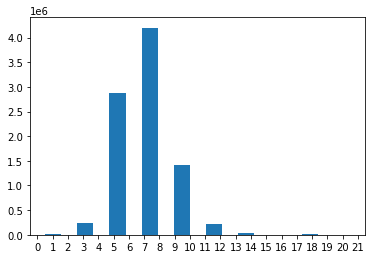

In [10]:
plt.hist(X.reshape(-1), rwidth=0.5)
plt.xticks(np.arange(0, X.max() + 1))
plt.show()

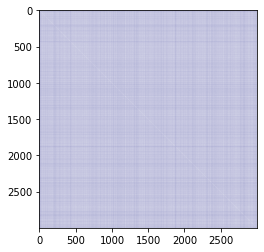

In [11]:
plt.imshow(X, cmap="Purples")
plt.show()

**Task 2.2 [1.5 point]** First algorithm we'll use is `DBSCAN`.

We have to adjust two parameters:
- `eps`
- `min_samples`

Grid-search these two parameters and report number and sizes of output clusters for every pair of parameters. 

**Note**: to define an appropriate space for each parameter remember what they mean and how they affect DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

Example:

In [13]:
eps = 3.0
min_samples = 3
db = DBSCAN(metric="precomputed", min_samples=min_samples, eps=eps).fit(X)
labels = db.labels_
len(set(labels))
db.labels_
#print(labels)

array([ 0,  0,  0, ...,  0, -1, -1])

In [14]:
#clustering = DBSCAN(metric="precomputed",eps=8.0, min_samples=10)
print('epsilon', 'minsample', 'clusters')
epsilons, minsamples = np.arange(1,6), np.arange(1,20)
for epsilon in epsilons:
  for minsample in minsamples:
        model = DBSCAN(metric="precomputed", min_samples=minsample,eps=epsilon)
        model.fit(X)
        labels = model.labels_
        print(epsilon,'     ', minsample,'        ', len(set(labels)))

epsilon minsample clusters
1       1          2205
1       2          333
1       3          120
1       4          45
1       5          22
1       6          12
1       7          9
1       8          6
1       9          5
1       10          4
1       11          4
1       12          5
1       13          5
1       14          5
1       15          4
1       16          4
1       17          4
1       18          3
1       19          3
2       1          1111
2       2          207
2       3          76
2       4          40
2       5          26
2       6          18
2       7          16
2       8          8
2       9          11
2       10          11
2       11          11
2       12          8
2       13          9
2       14          9
2       15          8
2       16          6
2       17          6
2       18          5
2       19          4
3       1          343
3       2          36
3       3          7
3       4          7
3       5          3
3       6          3
3  

In [15]:
eps = 1
min_samples = 5
db = DBSCAN(metric="precomputed", min_samples=min_samples, eps=eps).fit(X)
labels = db.labels_
len(set(labels))
#db.labels_
#print(labels)

22

**Task 2.3 [1 point]** Choose a set of parameters that leads to 20-25 clusters.

- Is there a cluster that is significantly larger than the others? 
- How would you describe these clusters, what kind of passwords they contain? 

Use small samples from each cluster and try to describe a relevant password pattern.

In [16]:
eps=1
min_sample=5
#print(X)
model = DBSCAN(metric="precomputed",eps=eps, min_samples=min_sample).fit(X)
labels = model.labels_
len(labels)



3000

In [17]:
basket={'0':0}

for x in range (0, 3000):
    b=labels[x]
    a=words[x]
    b=str(b)
    if b in basket:
        basket.update({ b: basket[b]+1})
    else:
        basket.update({b: 1})

In [18]:
print('label: number of words in label ',basket)

label: number of words in label  {'0': 76, '1': 16, '2': 12, '-1': 2738, '3': 15, '4': 4, '5': 5, '6': 5, '7': 7, '8': 8, '9': 6, '10': 9, '11': 6, '12': 5, '19': 5, '13': 5, '14': 5, '15': 5, '16': 14, '17': 19, '18': 8, '20': 27}


In [19]:
{k: v for k, v in sorted(basket.items(), key=lambda item: item[1])}

{'4': 4,
 '5': 5,
 '6': 5,
 '12': 5,
 '19': 5,
 '13': 5,
 '14': 5,
 '15': 5,
 '9': 6,
 '11': 6,
 '7': 7,
 '8': 8,
 '18': 8,
 '10': 9,
 '2': 12,
 '16': 14,
 '3': 15,
 '1': 16,
 '17': 19,
 '20': 27,
 '0': 76,
 '-1': 2738}

Есть огромный кластер - '0'. Вероятно, в нём объекты, не попавшие ни под одну классификацию. В них не прослеживается никакой логики. Между тем среди них явно есть слова, которые можно было бы связать в один кластер

In [20]:
for x in range(0,50):
  if (labels[x]==-1):
    print(words[x])

['123123']
['111111']
['abc123']
['1q2w3e4r5t']
['q1w2e3r4t5y6']
['iloveyou']
['000000']
['123321']
['1q2w3e4r']
['qwertyuiop']
['yuantuo2012']
['654321']
['1qaz2wsx3edc']
['1qaz2wsx']
['666666']
['ashley']
['princess']
['123qwe']
['159753']
['q1w2e3r4']
['zxcvbnm']
['123123123']
['asdfghjkl']
['pokemon']
['football']
['killer']
['112233']
['shadow']
['121212']
['asdasd']
['qazwsx']
['1234qwer']
['superman']


In [21]:
for x in range(0,40):
  if (labels[x]==0):
    print(words[x])

['123456']
['123456789']
['12345678']
['12345']
['1234']
['1234567890']
['1234567']


рассмотрим остальные кластеры

Преобразования слова password:

In [22]:
for x in range(0,1500):
  if (labels[x]==1):
    print(words[x])

['password']
['password1']
['Password']
['passw0rd']
['Password1']
['password123']
['passwort']
['password12']
['password2']
['Passw0rd']
['password01']


преобразования qwerty

In [23]:
for x in range(0,3000):
  if (labels[x]==2):
    print(words[x])

['qwerty']
['qwerty1']
['qwertyui']
['qwerty12']
['qwert']
['qwertyu']
['qwertz']
['qwer']
['qwerty11']
['Qwerty']
['qwerty7']
['qwert1']


преобразования 000

In [24]:
for x in range(0,3000):
  if (labels[x]==3):
    print(words[x])

['123']
['0000']
['111']
['100']
['2000']
['1010']
['200']
['000']
['12']
['010']
['1230']
['120']
['110']
['0123']
['220']



 qwerty1234

In [25]:
for x in range(0,3000):
  if (labels[x]==4):
    print(words[x])

['qwerty123']
['qwert123']
['qwerty1234']
['Qwerty123']


дракон

In [26]:
for x in range(0,3000):
  if (labels[x]==5):
    print(words[x])

['dragon']
['dragon1']
['dragons']
['dragoon']
['Dragon']


987654321

In [27]:
for x in range(0,3000):
  if (labels[x]==6):
    print(words[x])

['987654321']
['0987654321']
['87654321']
['9876543210']
['98765432']


monkey

In [29]:
for x in range(0,3000):
  if (labels[x]==7):
    print(words[x])

['monkey']
['money']
['monkey1']
['donkey']
['money1']
['monkeys']
['monkey12']


michael

In [30]:
for x in range(0,3000):
  if (labels[x]==8):
    print(words[x])

['michael']
['michael1']
['michele']
['michel']
['michal']
['Michael']
['michaela']
['micheal']


daniel

In [31]:
for x in range(0,3000):
  if (labels[x]==9):
    print(words[x])

['daniel']
['danielle']
['daniela']
['daniel1']
['Daniel']
['daniele']


andrew

In [32]:
for x in range(0,3000):
  if (labels[x]==10):
    print(words[x])

['andrew']
['andrea']
['audrey']
['andreas']
['andrei']
['andres']
['andrew1']
['andrey']
['andre']


tigger

In [33]:
for x in range(0,3000):
  if (labels[x]==11):
    print(words[x])

['tigger']
['tiger']
['nigger']
['tigger1']
['digger']
['trigger']


justin

In [34]:
for x in range(0,3000):
  if (labels[x]==12):
    print(words[x])

['justin']
['austin']
['justine']
['dustin']
['justin1']


cookie

In [35]:
for x in range(0,3000):
  if (labels[x]==13):
    print(words[x])

['cookie']
['cookies']
['pookie']
['mookie']
['cookie1']


angel_

In [36]:
for x in range(0,3000):
  if (labels[x]==14):
    print(words[x])

['angel']
['angels']
['angela']
['angelo']
['angel1']


harley

In [37]:
for x in range(0,3000):
  if (labels[x]==15):
    print(words[x])

['harley']
['marley']
['harvey']
['hailey']
['hayley']


пароли, состоящие из 1 буквы

In [39]:
for x in range(0,3000):
  if (labels[x]==17):
    print(words[x])

['p']
['n']
['i']
['m']
['2']
['s']
['k']
['b']
['l']
['d']
['c']
['j']
['M']
['h']
['q']
['z']
['3']
['t']
['f']


mar

In [40]:
for x in range(0,3000):
  if (labels[x]==18):
    print(words[x])

['mar']
['car']
['mark']
['dan']
['max']
['man']
['mon']
['mary']


lover

In [41]:
for x in range(0,3000):
  if (labels[x]==19):
    print(words[x])

['love']
['lovers']
['lover']
['clover']
['loser']


года (возможно, даты рождения)

In [45]:
for x in range(0,3000):
  if (labels[x]==20):
    print(words[x])

['6969']
['1985']
['1984']
['1987']
['1980']
['1986']
['1982']
['1988']
['1979']
['1977']
['1978']
['1983']
['1981']
['1989']
['1990']
['1991']
['1976']
['1975']
['198']
['1992']
['199']
['1974']
['1973']
['1993']
['1995']
['1994']
['1969']


Больше всего оказалось кластеров, образовыванных вокруг имён. Встречались образования вокруг каких-то слов, наборов цифр

**Task 2.4 [1 point]** 

Let's try to improve clustering by introducing a custome levenshtein distance. You might have noticed that there are some specific password generation patterns, like `qwerty -> qwerty123`.

Classic levenshtein distance for these two passwords is 3. Try to define a custom levenshtein distance that would make these passwords closer.

Feel free to experiment and create as complex levenshtein distance as you would like.

Report new clustering, describe new clusters.


In [47]:
!pip3 install -U strsimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 4.5 MB/s 


In [59]:
from strsimpy.weighted_levenshtein import WeightedLevenshtein

def insertion_cost(char):
  if(char.isnumeric()):
    return 0.5
  else:
    return 1


def deletion_cost(char):
  if(char.isnumeric()):
    return 0.5
  else:
    return 1

def substitution_cost(char_a, char_b):
    if (char_a, char_b) == ('a', 'o') or (char_a, char_b) == ('o', 'a'):
        return 0.5
    if (char_a, char_b) == ('c', 'k') or (char_a, char_b) == ('k', 'c'):
        return 0.5
    if (char_a, char_b) == ('c', 's') or (char_a, char_b) == ('s', 'c'):
        return 0.5
    if (char_a, char_b) == ('u', 'a') or (char_a, char_b) == ('a', 'u'):
        return 0.5
    if (char_a, char_b) == ('e', 'i') or (char_a, char_b) == ('i', 'e'):
        return 0.5
    if (char_a, char_b) == ('o', '0') or (char_a, char_b) == ('0', 'o'):
        return 0.5
    if (char_a, char_b) == ('i', '1') or (char_a, char_b) == ('1', 'i'):
        return 0.5
    if (char_a, char_b) == ('t', 'd') or (char_a, char_b) == ('d', 't'):
        return 0.5
    if (char_a, char_b) == ('s', '5') or (char_a, char_b) == ('5', 's'):
        return 0.5
    if (char_a, char_b) == ('l', '1') or (char_a, char_b) == ('1', 'l'):
        return 0.5
    if (char_a, char_b) == ('v', 'w') or (char_a, char_b) == ('w', 'v'):
        return 0.5
    if (char_a, char_b) == ('s', 'z') or (char_a, char_b) == ('z', 's'):
        return 0.5
    if(char_a.isnumeric()):
      if(char_b.isnumeric()):
        m=abs(int(char_a)-int(char_b))
        return m*0.01
      else:
        return 2
    if(char_b.isnumeric()):
        return 2
    return 1.0

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)

In [63]:
print(levenshtein('Stting1', 'String1'))
print(weighted_levenshtein.distance('Str1ng9', 'Sdringm'))
print(weighted_levenshtein.distance('qwerty675', 'qwert123'))

1
2.5
1.12


In [64]:
words.shape[0]

3000

In [65]:
def my_metric(x,y):
    return weighted_levenshtein.distance(x, y)

X_new = np.zeros((words.shape[0], words.shape[0]))
for i in range(0,words.shape[0]):
  #print(i)
  for j in range(0,words.shape[0]):
    dist=my_metric(np.array2string(words[i]), np.array2string(words[j]))
    #print(dist)
    X_new[i][j]=dist
print(X_new)

[[ 0.   1.5 10.  ...  3.  11.  14. ]
 [ 1.5  0.  11.5 ...  4.5 12.5 15.5]
 [10.  11.5  0.  ...  9.5  6.  11. ]
 ...
 [ 3.   4.5  9.5 ...  0.  10.  14. ]
 [11.  12.5  6.  ... 10.   0.  11. ]
 [14.  15.5 11.  ... 14.  11.   0. ]]


In [66]:
print('epsilon', 'minsample', 'clusters')
epsilons, minsamples = np.arange(1,6), np.arange(1,20)
for epsilon in epsilons:
  for minsample in minsamples:
        model = DBSCAN(metric="precomputed", min_samples=minsample,eps=epsilon)
        model.fit(X_new)
        labels = model.labels_
        print(epsilon,'     ', minsample,'        ', len(set(labels)))

epsilon minsample clusters
1       1          1947
1       2          324
1       3          118
1       4          51
1       5          19
1       6          11
1       7          6
1       8          4
1       9          5
1       10          3
1       11          3
1       12          3
1       13          3
1       14          2
1       15          2
1       16          2
1       17          2
1       18          2
1       19          2
2       1          985
2       2          183
2       3          66
2       4          32
2       5          19
2       6          17
2       7          14
2       8          9
2       9          9
2       10          8
2       11          7
2       12          6
2       13          8
2       14          7
2       15          9
2       16          9
2       17          8
2       18          5
2       19          5
3       1          293
3       2          31
3       3          8
3       4          7
3       5          5
3       6          4
3      

In [67]:
def my_metric(X):
    return weighted_levenshtein.distance(X[0], X[1])

X=X_new
plt.show()
eps=1
min_sample=5 
#print(X) 
model = DBSCAN( metric='precomputed',eps=eps, min_samples=min_sample).fit(X_new) 
labels = model.labels_ 
len(labels)
basket={'0':0} 
 
for x in range (0, 3000): 
    b=labels[x] 
    a=words[x] 
    b=str(b) 
    if b in basket: 
        basket.update({ b: basket[b]+1}) 
    else: 
        basket.update({b: 1})

print('label: number of words in label ',basket)
{k: v for k, v in sorted(basket.items(), key=lambda item: item[1])}


label: number of words in label  {'0': 401, '1': 21, '2': 20, '17': 4, '-1': 2458, '3': 6, '4': 10, '5': 8, '6': 5, '15': 5, '7': 9, '8': 6, '9': 5, '16': 5, '10': 5, '11': 5, '12': 5, '13': 14, '14': 8}


{'17': 4,
 '6': 5,
 '15': 5,
 '9': 5,
 '16': 5,
 '10': 5,
 '11': 5,
 '12': 5,
 '3': 6,
 '8': 6,
 '5': 8,
 '14': 8,
 '7': 9,
 '4': 10,
 '13': 14,
 '2': 20,
 '1': 21,
 '0': 401,
 '-1': 2458}

из этого кластера ушли все численные значения

In [68]:
for x in range(0,50):
  if (labels[x]==-1):
    print(words[x])

['1q2w3e4r5t']
['q1w2e3r4t5y6']
['iloveyou']
['1q2w3e4r']
['qwertyuiop']
['yuantuo2012']
['1qaz2wsx3edc']
['1qaz2wsx']
['ashley']
['princess']
['123qwe']
['q1w2e3r4']
['zxcvbnm']
['asdfghjkl']
['pokemon']
['football']
['killer']
['shadow']
['asdasd']
['qazwsx']
['1234qwer']
['superman']


численные значения ушли в этот кластер


In [69]:
for x in range(0,50):
  if (labels[x]==0):
    print(words[x])

['123456']
['123456789']
['12345678']
['12345']
['123123']
['111111']
['1234']
['1234567890']
['1234567']
['123']
['000000']
['123321']
['654321']
['666666']
['987654321']
['159753']
['123123123']
['112233']
['121212']


In [71]:
for x in range(0,3000):
  if (labels[x]==1):
    print(words[x])

['password']
['password1']
['Password']
['passw0rd']
['Password1']
['password123']
['passwort']
['password12']
['pa55word']
['password2']
['Passw0rd']
['passport']
['password01']
['pa55w0rd']
['1password']
['P@ssw0rd']
['password11']
['pasword']
['Password123']
['Passwort']
['password3']


в этом кластере оказалось намного больше паролей со словом qwerty, чем в прошлый раз

In [72]:
for x in range(0,3000):
  if (labels[x]==2):
    print(words[x])

['qwerty']
['qwerty123']
['qwerty1']
['qwerty12']
['qwerty12345']
['qwert']
['qwert123']
['qwertyu']
['qwerty123456']
['qwertz']
['qwerty1234']
['qwert12345']
['qwer']
['qwerty321']
['Qwerty123']
['qwerty11']
['qwer123']
['Qwerty']
['qwerty7']
['qwert1']


здесь тоже больше похожих на monkey слов (теперь и с цифрами на конце)

In [75]:
for x in range(0,3000):
  if (labels[x]==4):
    print(words[x])

['monkey']
['money']
['monkey1']
['donkey']
['money1']
['monkey123']
['monkeys']
['monkey12']
['money123']
['honey1']


появился кардинально другой кластер

In [85]:
for x in range(0,3000):
  if (labels[x]==13):
    print(words[x])

['marina']
['marine']
['maria']
['martina']
['karina']
['marie']
['marion']
['mariana']
['mario']
['marian']
['mariah']
['marco']
['miriam']
['mariam']


и ещё такие

In [87]:
for x in range(0,3000):
  if (labels[x]==15):
    print(words[x])

['asd123']
['asdf1234']
['asdf123']
['asdf12345']
['asdfg123']


In [89]:
for x in range(0,3000):
  if (labels[x]==17):
    print(words[x])

['abc123']
['abcd1234']
['abc12345']
['abc1234']


остальные кластеры остались почти такими же